In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [32]:
# Load data
df = pd.read_excel('/content/EastWestAirlines.xlsx', sheet_name='data')
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [34]:
# Drop ID column
data = df.drop(columns=['ID#'], errors='ignore')
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [19]:
# Scale the data
scaler = StandardScaler()
scaled = scaler.fit_transform(data)

In [35]:
# Hierarchical Clustering
linked = linkage(scaled, method='ward')
linked

array([[3.37000000e+03, 3.87600000e+03, 0.00000000e+00, 2.00000000e+00],
       [2.67800000e+03, 2.67900000e+03, 2.26431613e-03, 2.00000000e+00],
       [3.49100000e+03, 3.99800000e+03, 2.70573802e-03, 2.00000000e+00],
       ...,
       [7.98000000e+03, 7.99100000e+03, 8.49336415e+01, 2.48900000e+03],
       [7.98600000e+03, 7.99300000e+03, 9.04271377e+01, 1.51000000e+03],
       [7.99400000e+03, 7.99500000e+03, 1.23912267e+02, 3.99900000e+03]])

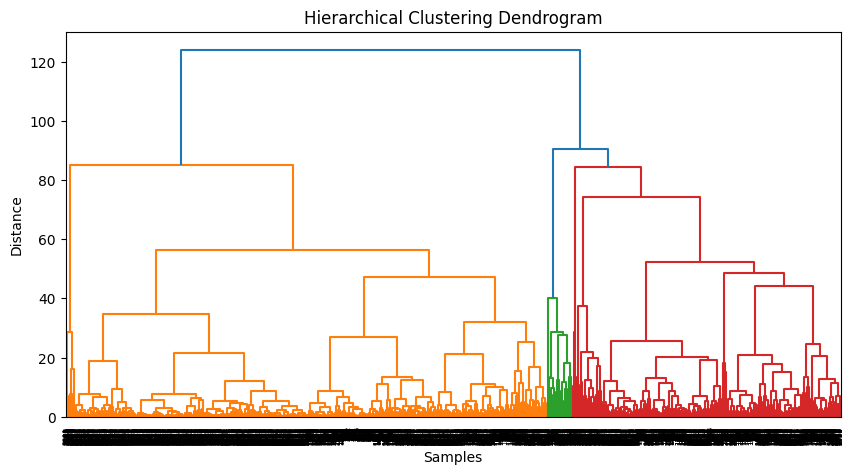

In [21]:
# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

In [37]:
# Assign clusters
df['Hierarchical'] = fcluster(linked, 5, criterion='maxclust')
df['Hierarchical']

,Hierarchical
0,2
1,2
2,2
3,2
4,5
...,...
3994,2
3995,2
3996,5
3997,2


In [38]:
# K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=0)
df['KMeans'] = kmeans.fit_predict(scaled)
df['KMeans']

,KMeans
0,1
1,1
2,1
3,1
4,2
...,...
3994,0
3995,0
3996,0
3997,1


In [39]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=2, min_samples=5)
df['DBSCAN'] = dbscan.fit_predict(scaled)
df['DBSCAN']

,DBSCAN
0,0
1,0
2,0
3,0
4,1
...,...
3994,1
3995,1
3996,1
3997,0


In [25]:
# PCA for 2D Visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled)
df['PCA1'] = pca_data[:, 0]
df['PCA2'] = pca_data[:, 1]

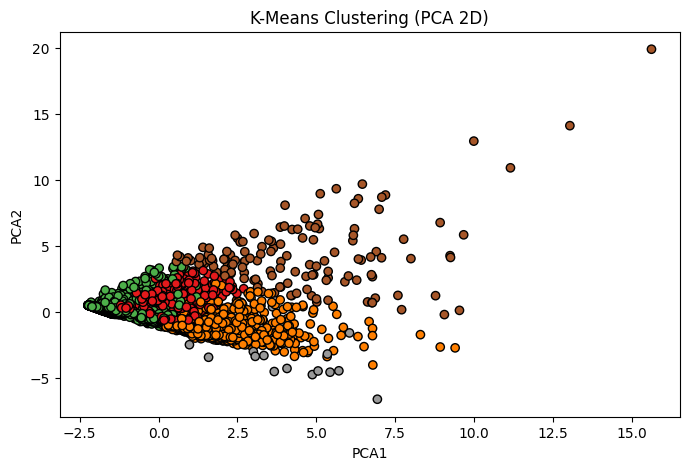

In [26]:
# Visualize K-Means Clusters
plt.figure(figsize=(8, 5))
plt.scatter(df['PCA1'], df['PCA2'], c=df['KMeans'], cmap='Set1', edgecolor='k')
plt.title("K-Means Clustering (PCA 2D)")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

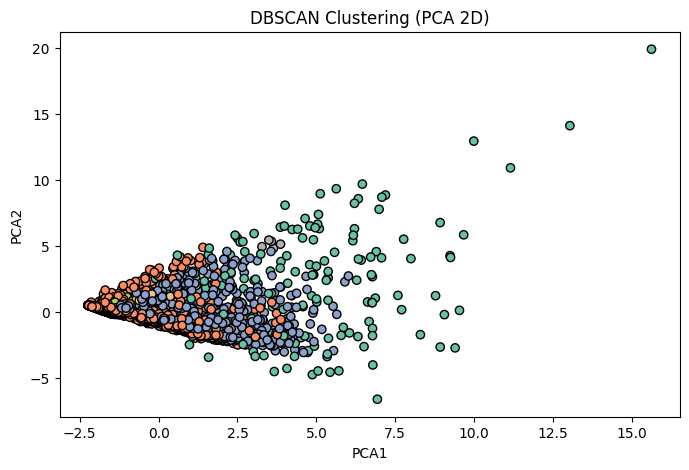

In [27]:
# Visualize DBSCAN Clusters
plt.figure(figsize=(8, 5))
plt.scatter(df['PCA1'], df['PCA2'], c=df['DBSCAN'], cmap='Set2', edgecolor='k')
plt.title("DBSCAN Clustering (PCA 2D)")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

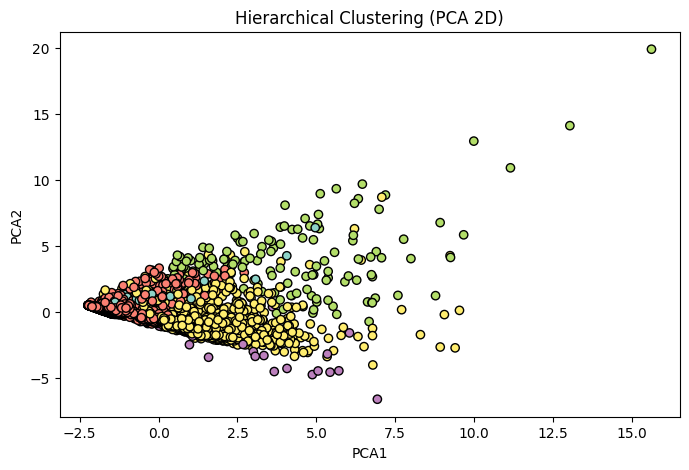

In [28]:
# Visualize Hierarchical Clusters
plt.figure(figsize=(8, 5))
plt.scatter(df['PCA1'], df['PCA2'], c=df['Hierarchical'], cmap='Set3', edgecolor='k')
plt.title("Hierarchical Clustering (PCA 2D)")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

In [29]:
# Silhouette Scores
print("Silhouette Scores:")

if len(set(df['KMeans'])) > 1:
    print("  KMeans:", round(silhouette_score(scaled, df['KMeans']), 3))

if len(set(df['Hierarchical'])) > 1:
    print("  Hierarchical:", round(silhouette_score(scaled, df['Hierarchical']), 3))

if len(set(df['DBSCAN'])) > 1 and len(set(df['DBSCAN'])) != 1 + (1 if -1 in df['DBSCAN'] else 0):
    non_noise = df['DBSCAN'] != -1
    print("  DBSCAN:", round(silhouette_score(scaled[non_noise], df['DBSCAN'][non_noise]), 3))
else:
    print("  DBSCAN: Not applicable")

Silhouette Scores:
  KMeans: 0.269
  Hierarchical: 0.31
  DBSCAN: 0.281
